In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


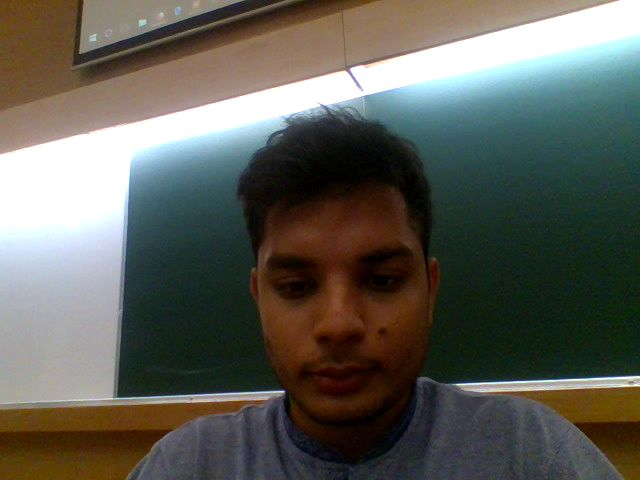

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [0]:
import cv2
img = cv2.imread('photo.jpg')
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml') 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)  

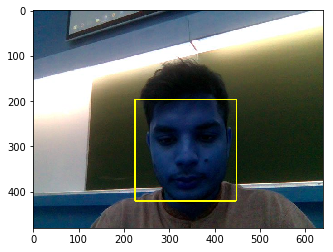

In [0]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [0]:
import sklearn.linear_model as sk

In [0]:
reg = sk.LinearRegression()

In [0]:
import numpy as np
X = np.array([[1,1],[2,2],[3,3],[4,4],[5,5]])
Y = np.array([[1],[2],[3],[4],[5]])

In [0]:
reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
reg.coef_

array([[0.5, 0.5]])

In [0]:
reg.intercept_

array([0.])

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


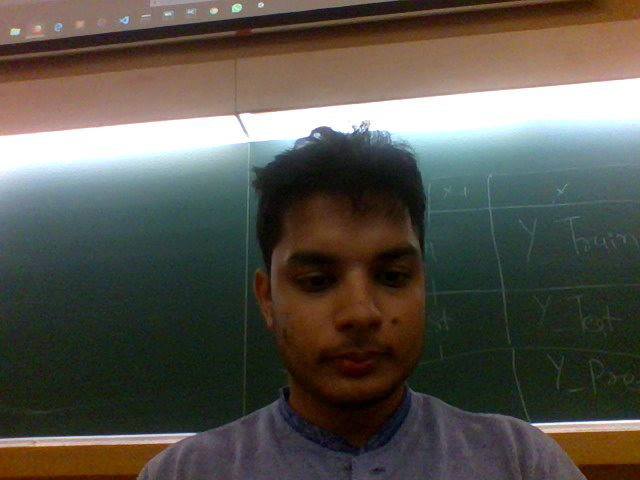

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [0]:
import cv2

In [0]:
image = cv2.imread('photo.jpg')

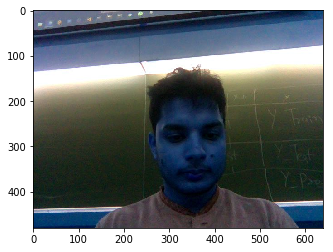

In [0]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [0]:
type(image)

numpy.ndarray

In [0]:
image.shape

(480, 640, 3)

In [0]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml') 

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

array([[134, 131, 129, ...,  79,  80,  80],
       [134, 132, 131, ...,  79,  79,  80],
       [133, 133, 133, ...,  79,  80,  81],
       ...,
       [ 50,  50,  49, ...,  30,  29,  28],
       [ 41,  41,  40, ...,  30,  30,  29],
       [ 36,  36,  35, ...,  30,  30,  30]], dtype=uint8)

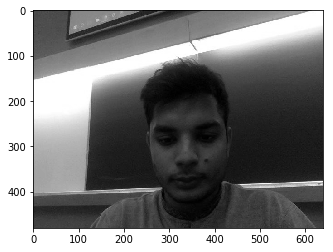

In [0]:
plt.imshow(gray,cmap = "gray")

In [0]:
face = face_cascade.detectMultiScale(gray,1.05)

In [0]:
x = face[0][0]
y = face[0][1]
w = face[0][2]
h = face[0][3]

In [0]:
ans = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)

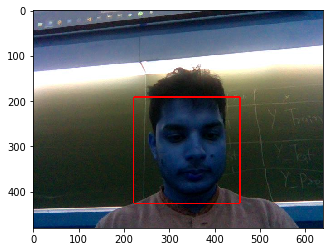

In [0]:
plt.imshow(image)